## Decision-making simulation
In this notebook I am simulating the effect of overall decision accuracy according to the population distribution of average, bad, good and excellent decision-makers.

    - A decision consists of a few options with one of them being correct.
    - A decision-maker is classified as average, bad, good or excellent according to the probability of making the correct decision.

I specify the relative weights of average, bad, good and excellent decision makers. Then I create a population distribution according to the weights and let them decide. Finally, I collect the decision of the majority of the population and check if it is correct. I iterate the whole process over various population sizes and compute the accuracy of this majority decision.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Global parameters of the experiment

n_trials = 50 # the number of trials
n_options = 2 # the number of decision options to choose from
average_weight = 100 # the weight of average decision-makers
bad_weight = 10 # the weight of bad decision-makers
good_weight = 10 # the weight of good decision-makers
excellent_weight = 5 # the weight of excellent decision-makers

In [3]:
# Create probability distribution of average, good and excellent decision-makers

total_weight = average_weight + bad_weight + good_weight + excellent_weight
prob_distn = np.asarray([average_weight, bad_weight, good_weight, excellent_weight])/total_weight

In [4]:
# Decision setup - options to choose from and the correct option

decision_options = np.asarray(range(1, n_options+1)) # decision options
correct_option = np.random.choice(decision_options) # the correct option
initial_accuracy = 100/n_options # probability of correct decision if all options are equally likely

In [5]:
class decision_maker:
    '''
    generic decision-maker
    
    '''
    
    options = decision_options
    bias = np.ones(n_options)*(100/n_options) # all decision options are equally likely
    
    def __init__(self):
        pass

    def decide(self):
        return np.random.choice(self.options, p=self.bias)

In [6]:
class average_decision_maker(decision_maker):
    '''
    random probability of making correct decision
    
    '''

    def __init__(self):
        array = np.random.choice(range(1,100), n_options)
        self.bias = array/sum(array)

In [7]:
class bad_decision_maker(decision_maker):
    '''
    unlikely to make the correct decision
    
    '''
    
    def __init__(self):
        array = np.random.choice(range(1,100), n_options)
        array[correct_option-1] = min(array)/2 # probability of correct decision is very low
        self.bias = array/sum(array)

In [8]:
class good_decision_maker(decision_maker):
    '''
    quite likely to make the correct decision
    
    '''
    
    def __init__(self):
        array = np.random.choice(range(1,100), n_options)
        array[correct_option-1] = 2*max(array) # probability of correct decision is quite high
        self.bias = array/sum(array)

In [9]:
class excellent_decision_maker(decision_maker):
    '''
    makes the correct decision with very high probability
    
    '''
    
    def __init__(self):
        array = np.random.choice(range(1,100), n_options)
        array[correct_option-1] = 10*max(array) # probability of correct decision is extremely high
        self.bias = array/sum(array)

In [10]:
def crowd_source_decisions(population_size):
    '''
    creates a population of decision-makers according to population distribution and returns their decisions

    '''
    
    decisions = []
    
    for i in range(1, population_size+1):
        decision_maker_type = np.random.choice(len(prob_distn), 1, p=prob_distn)[0]
        if (decision_maker_type==0):
            decision_maker = average_decision_maker()
            decisions.append(decision_maker.decide())
        if (decision_maker_type==1):
            decision_maker = bad_decision_maker()
            decisions.append(decision_maker.decide())
        if (decision_maker_type==2):
            decision_maker = good_decision_maker()
            decisions.append(decision_maker.decide())
        if (decision_maker_type==3):
            decision_maker = excellent_decision_maker()
            decisions.append(decision_maker.decide())
                
    return decisions

In [11]:
# Run the decision-making process for the selected number of trials with increasing population size and compute results

n_decision_makers = []
accuracy_values = []
majority_vote = []
for i in range(1, n_trials+1):
    population_decisions = crowd_source_decisions(i*10)
    n_decision_makers.append(i*10) # number of decision makers
    accuracy_values.append((sum(population_decisions == correct_option)/(i*10))*100)
    majority_vote.append(max(population_decisions, key=population_decisions.count))
    
majority_vote_accuracy = round((sum(majority_vote == correct_option)*100)/len(majority_vote),2)

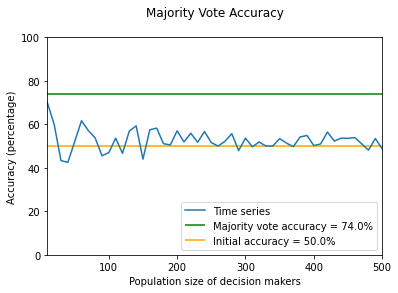

In [12]:
# Plot results

# x-axis values 
x = n_decision_makers
# y-axis values 
y = accuracy_values

# Plot the points 
plt.plot(x, y) 

plt.hlines(majority_vote_accuracy, min(x), max(x), color='green')
plt.hlines(100/n_options, min(x), max(x), color='orange')

# x-axis name
plt.xlabel('Population size of decision makers') 
# y-axis name 
plt.ylabel('Accuracy (percentage)') 

# Graph title
plt.title(F'Majority Vote Accuracy\n') 


# Plot legends
plt.xlim((min(x), max(x)))
plt.ylim(0, 100)
legends = [F'Time series', 
           F'Majority vote accuracy = {majority_vote_accuracy}%', 
           F'Initial accuracy = {initial_accuracy}%']
plt.legend(legends, loc='lower right')

# Display the graph
plt.show() 